<a href="https://colab.research.google.com/github/WojciechMierzwa/Sztuczna_Inteligencja/blob/main/AI_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(tf.__version__)


2.18.0


In [43]:
observations = 100000
xs = np.random.uniform(low=-10, high=10, size=(observations,1))
zs = np.random.uniform(low=-10, high=10, size=(observations,1))
inputs=np.column_stack((xs,zs))
print(inputs.shape)

(100000, 2)


In [44]:
noise = np.random.uniform(low=-1,high=1, size=(observations,1))
targets = 13*xs - 7*zs - 12 + noise
np.savez('TF_dataset', inputs=inputs, targets=targets)
print(targets.shape)

(100000, 1)


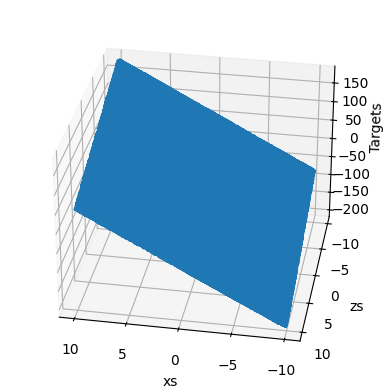

In [45]:
targets = targets.reshape(observations,)
xs = xs.reshape(observations,)
zs = zs.reshape(observations,)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(xs,zs,targets)
ax.set_xlabel('xs')
ax.set_ylabel('zs')
ax.set_zlabel('Targets')
ax.view_init(azim=100)
plt.show()


In [46]:
init_range = 0.1
weights = np.random.uniform(low=-init_range, high=init_range, size=(2,1))
biases = np.random.uniform(low=-init_range, high=init_range, size=1)
print(weights,biases)

[[ 0.0968948 ]
 [-0.07874344]] [-0.08087135]


In [47]:
targets = targets.reshape(observations,1)
eta = 0.02
for i in range (100):
  outputs = np.dot(inputs, weights) + biases
  deltas = outputs - targets

  loss = np.sum(deltas ** 2)/2/observations
  print(loss)

  deltas_scaled = deltas/observations
  weights = weights - eta * np.dot(inputs.T, deltas_scaled)
  biases = biases - eta * np.sum(deltas_scaled)

3642.4788737500394
466.3431112462336
110.03764325417703
68.04047351917407
61.15770567924227
58.27501586998214
55.921844610061065
53.70814356518893
51.58726233613513
49.55094232639741
47.59532423364032
45.717155368972996
43.91336241658958
42.180999398335175
40.517237624142474
38.91936048948785
37.38475897464926
35.91092737744064
34.49545922108549
33.13604332482438
31.83046003020172
30.57657757679953
29.372348621492424
28.215806895539373
27.105063994053978
26.03830629261136
25.01379198595649
24.029848243979206
23.084868480312153
22.177309729091533
21.305690125597767
20.4685864866621
19.664631986888985
18.892513926899117
18.15097158994997
17.4387941834337
16.754818861891057
16.09792882831393
15.467051510635624
14.861156810432021
14.279255420973564
13.7203972118823
13.183669677756
12.668196448226615
12.173135857019947
11.69767956768041
11.24105125371686
10.802505331014164
10.38132574044127
9.976824778667634
9.588341975279087
9.215243014359736
8.856918698778973
8.5127839554925
8.18227688023

In [48]:
print(weights,biases)

[[13.00072564]
 [-6.99979982]] [-10.42098744]


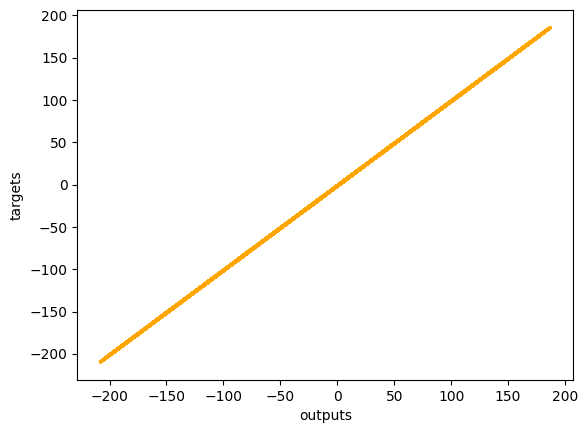

In [49]:
plt.plot(outputs, targets, color = 'orange')
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()